Rendering frames: 100%|##########| 100/100 [01:13<00:00,  1.36it/s]


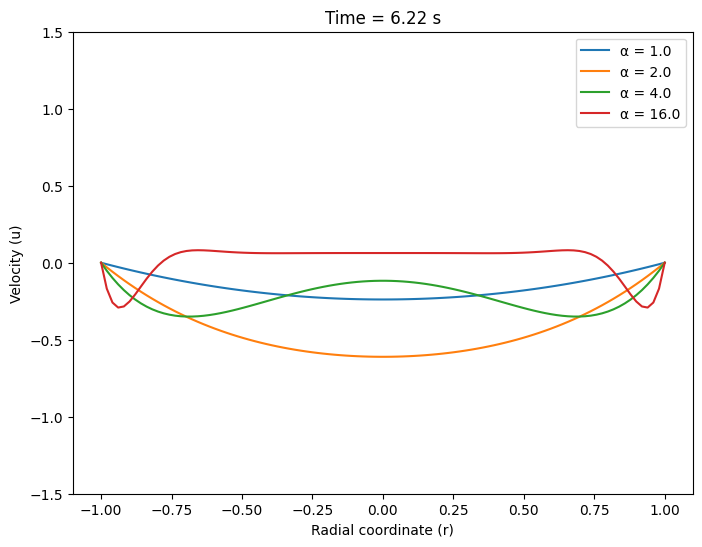

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

def ux(r, t, w, alpha):
    """
    Calculate the radial velocity profile for pulsatile flow in a cylinder.

    Parameters:
    - r: Radial coordinate
    - t: Time
    - w: Angular frequency of the pulsatile flow
    - alpha: Womersley number

    Returns:
    - Real part of the velocity profile.
    """
    # Constants
    area = 1
    rho = 1

    # Pulsatile flow adjustment
    const_term = (area * 1j) / (w * rho)
    bessel_numerator = scipy.special.jv(0, alpha * r * np.power(1j, 1.5))
    bessel_denominator = scipy.special.jv(0, alpha * np.power(1j, 1.5))
    bessel_term = (1 - bessel_numerator / bessel_denominator)
    exp_term = np.exp(1j * w * t)

    return np.real(const_term * bessel_term * exp_term)

def main():
    w = 1  # Angular frequency
    num_frames = 100
    ts = np.linspace(0, 2*np.pi / w, num_frames, endpoint=False)
    r_fraction = np.linspace(-1., 1., 100, endpoint=True)

    out_dir = 'img'
    if not os.path.isdir(out_dir):
        os.makedirs(out_dir)

    alphas = [1, 2, 4, 16]  # Womersley numbers

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)

    for i, t in tqdm(enumerate(ts), total=num_frames, desc='Rendering frames: ', ascii=True):
        ax.cla()
        for alpha in alphas:
            u = ux(r_fraction, t, w, alpha=alpha)
            ax.plot(r_fraction, u, label=f'α = {alpha:.1f}')
        ax.set_ylim(-1.5, 1.5)
        ax.legend(loc='upper right')
        ax.set_xlabel('Radial coordinate (r)')
        ax.set_ylabel('Velocity (u)')
        ax.set_title(f'Time = {t:.2f} s')
        plt.savefig(os.path.join(out_dir, f'{i}.png'), dpi=300)

if __name__ == '__main__':
    main()
